In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [12]:
# Load the dataset
ecg_dataset = pd.read_csv("ecg.csv")

In [15]:
# Select only the numeric columns and scale the data
scaler = StandardScaler()
X = scaler.fit_transform(ecg_dataset.select_dtypes(include=[np.number]).values)

In [16]:
# Autoencoder input and output are the same
y = X  

In [17]:
# Train-test split
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)

In [18]:
# Define the input dimension for the autoencoder
input_dim = X_train.shape[1]

In [19]:
# Encoder model
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
])

In [20]:
# Decoder model
decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Linear activation for reconstruction
])

In [21]:
# Full autoencoder model
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8729
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3459
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2829
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2424
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2330
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2200
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2228
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2131
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2044
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1996
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1946
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1820
Epoch 13/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1829
Epoch 14/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1797
Epoch 15/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0

In [23]:
# Make predictions on the test set
y_pred = autoencoder.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [24]:
# Calculate mean squared error (MSE) for each sample
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

In [25]:
# Set a threshold for anomaly detection (you may adjust this based on the MSE distribution)
threshold = np.percentile(mse, 95)  # For example, 95th percentile
anomalies = mse > threshold  # Boolean array of anomalies

In [26]:
# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


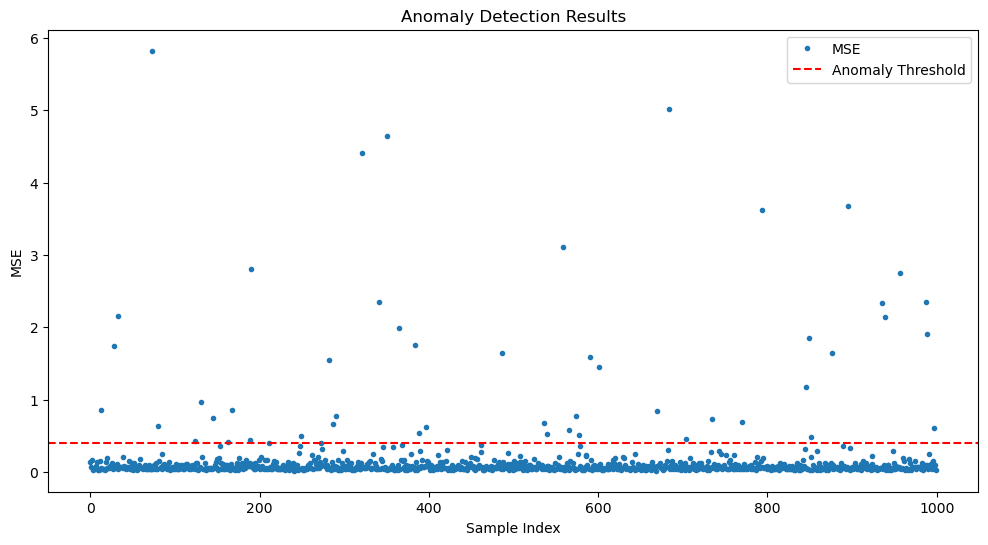

In [27]:
# Plot the Mean Squared Error (MSE) distribution and threshold
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

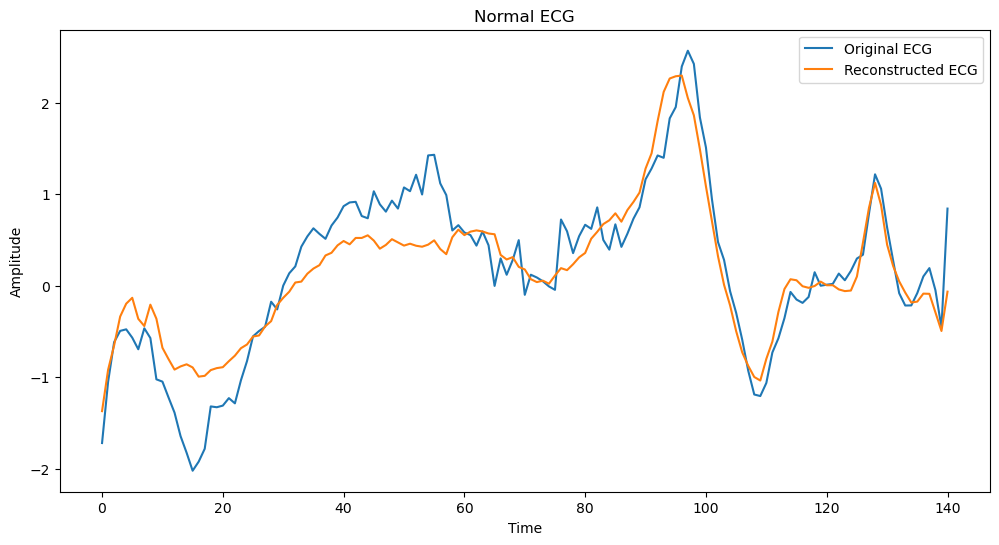

In [28]:
# Plot an example of a normal ECG and its reconstruction
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

In [29]:
# Plot a few examples of anomalous ECG signals and their reconstructions
anomalies_index = np.where(anomalies)[0]  # Get indices of anomalies

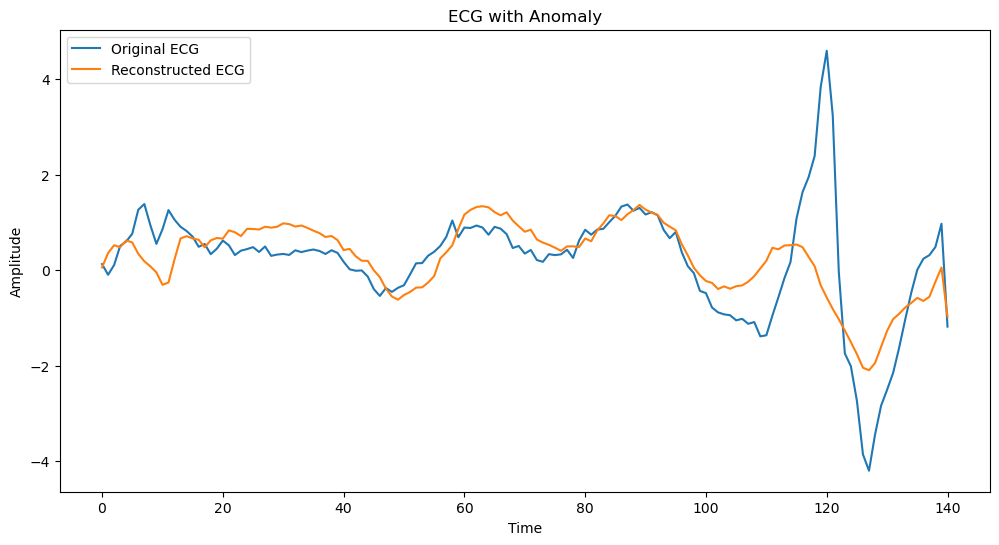

In [30]:
n = 0  # Change this index to view different anomalous samples
if n < len(anomalies_index):
    anomaly_index = anomalies_index[n]
    plt.figure(figsize=(12, 6))
    plt.plot(X_test[anomaly_index], label='Original ECG')
    plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title('ECG with Anomaly')
    plt.show()

In [31]:
# Create a binary true label array for evaluation (assuming all test samples are normal)
y_true = np.zeros(len(X_test))
y_pred_labels = anomalies.astype(int)  # 1 for anomaly, 0 for normal

In [32]:
# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels))

Confusion Matrix:
[[950  50]
 [  0   0]]


In [33]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.95      1000
   macro avg       0.50      0.47      0.49      1000
weighted avg       1.00      0.95      0.97      1000



C:\Users\devan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


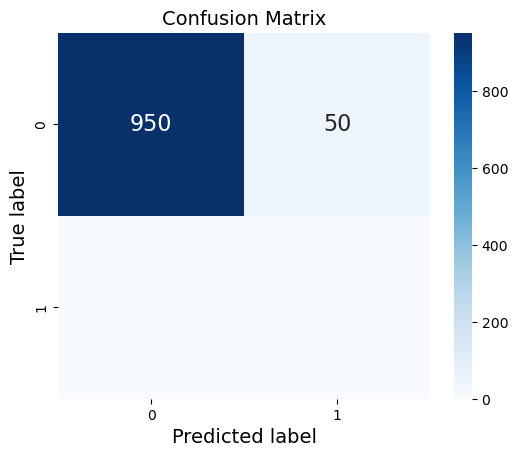

In [37]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4.75))
sns.heatmap(confusion_matrix(y_true, y_pred_labels), annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)
plt.title("Confusion Matrix", fontsize=14)
plt.show()